In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from lls_cleaned import LLS

In [2]:
companies = pd.read_csv("1000_Companies.csv")

In [3]:
companies.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


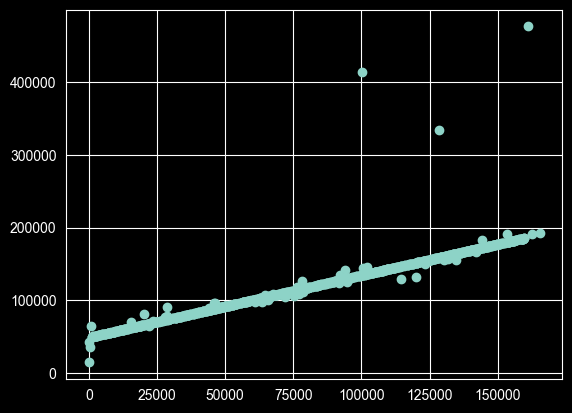

In [4]:
x = np.array(companies[["R&D Spend"]])
y = np.array(companies[["Profit"]])
plt.scatter(x, y)
plt.show()

In [5]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
companies.drop("State", axis = 1, inplace = True)

In [7]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,Profit
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000
999,161181.72,270939.860,295442.1700,476485.43000


In [8]:
companies.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [8]:
x = np.array(companies[["R&D Spend"]])
y = np.array(companies[["Profit"]])
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(750, 1)
(750, 1)
(250, 1)
(250, 1)


In [9]:
lls = LLS()
lls.fit(X_train, Y_train)

array([[1.3177028]])

In [11]:
output = lls.predict(X_test)

In [8]:
output

array([[ 14808.02331698],
       [196908.74082534],
       [ 60809.78275485],
       [ 12197.30726976],
       [159218.32816168],
       [ 60185.25338949],
       [ 61209.11494863],
       [ 25719.61185136],
       [ 47585.99535418],
       [ 92332.14963193],
       [182227.71823884],
       [123933.28314762],
       [137908.39115838],
       [145829.57073997],
       [116843.29061488],
       [ 41906.3132013 ],
       [ 24419.49097127],
       [ 77048.85554005],
       [ 37647.63829392],
       [ 64995.56971722],
       [211032.95031226],
       [125146.7816738 ],
       [ 26422.69836959],
       [138083.83546647],
       [  9493.63192497],
       [ 85505.53304707],
       [ 84475.12505852],
       [180151.19083117],
       [ 82126.26618755],
       [ 50256.93855194],
       [208351.8994275 ],
       [ 80184.59522565],
       [ 82359.31907441],
       [ 11983.89367112],
       [112703.32865836],
       [180305.68656516],
       [ 48777.44550612],
       [ 89886.40360574],
       [1232

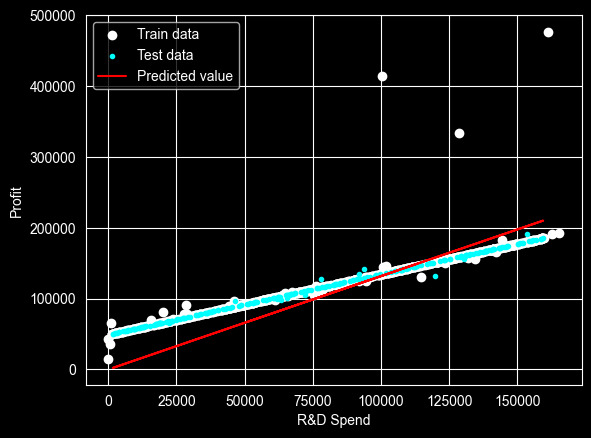

In [12]:
plt.scatter(X_train, Y_train, marker = "o", color = "white")
plt.scatter(X_test, Y_test, marker = ".", color = "cyan")
plt.plot(X_test, output, color = "red")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.legend(["Train data", "Test data", "Predicted value"], loc = "upper left")
plt.show()

In [10]:
lls.evaluate(X_test, Y_test, "mse")

np.float64(1271618902.2677631)